In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Работа с массивами NumPy

**N. Все упражнения ниже нужно делать без использования циклов Python**

**1.** Cоздать вектор

$$(2, \frac{2^2}{2}, \ldots, \frac{2^{20}}{20})$$

Можно использовать функции [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [np.ones()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)

In [8]:
2 ** np.arange(1, 21) / np.arange(1, 21)

array([2.00000000e+00, 2.00000000e+00, 2.66666667e+00, 4.00000000e+00,
       6.40000000e+00, 1.06666667e+01, 1.82857143e+01, 3.20000000e+01,
       5.68888889e+01, 1.02400000e+02, 1.86181818e+02, 3.41333333e+02,
       6.30153846e+02, 1.17028571e+03, 2.18453333e+03, 4.09600000e+03,
       7.71011765e+03, 1.45635556e+04, 2.75941053e+04, 5.24288000e+04])

**2.** Посчитать:

$$\sum\limits_{i=0}^{5}{0.1^{3i}0.2^{4i}}$$


In [16]:
(0.1 ** (3 * np.arange(0, 6))).dot(0.2 ** (4 * np.arange(0, 6)))

1.00000160000256

**3.** Создать нулевую матрицe $8 \times 8$, и заполнить её единицами в шахматном порядке.

In [25]:
matrix = np.zeros((8, 8))
matrix[1::2,::2] = 1
matrix[::2, 1::2] = 1
matrix

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

**4.** Есть 5 точек в декартовой системе координат (в виде матрицы $X$ размерностью $5 \times 2$), сконвертируйте эти точки в полярную систему координат.

In [50]:
X = np.random.random((5, 2))

# print(X)

dist = np.sqrt(X.dot(X.transpose())[np.identity(5) > 0]).reshape((5,1))
corn = np.arctan(X[:,1] / X[:,0]).reshape((5,1))
np.concatenate((dist, corn), axis=1)

# проверка
# print(dist * np.cos(corn))
# print(dist * np.sin(corn))

array([[0.68814579, 0.0575854 ],
       [0.624347  , 1.27502741],
       [0.53577633, 1.06161387],
       [1.25159622, 0.89655951],
       [0.83056664, 1.28383058]])

**5.** Найдите индексы максимального элемента в случайной матрице $10 \times 10$.

Cм. [np.argmax()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

In [44]:
X = np.random.random((10, 10))

(np.argmax(X)//10, np.argmax(X)%10) 


(3, 7)

**6.** Есть 10 точек ($X$) и ещё одна ($y$). Найти в $X$ ближайшую к $y$ точку.

[[0.18609202 0.46954739]
 [0.36394004 0.05166107]
 [0.16511804 0.66785791]
 [0.66580031 0.29223271]
 [0.84191402 0.61651648]
 [0.27224085 0.19767419]
 [0.83111185 0.37404845]
 [0.812894   0.23003179]
 [0.87841999 0.23081677]
 [0.12641224 0.90934407]]
[[0.62871734 0.35006806]]
[[-0.44262532  0.11947933]
 [-0.2647773  -0.29840698]
 [-0.46359931  0.31778985]
 [ 0.03708297 -0.05783535]
 [ 0.21319668  0.26644842]
 [-0.3564765  -0.15239387]
 [ 0.20239451  0.0239804 ]
 [ 0.18417665 -0.12003627]
 [ 0.24970264 -0.11925129]
 [-0.5023051   0.55927601]]


array([0.66580031, 0.29223271])

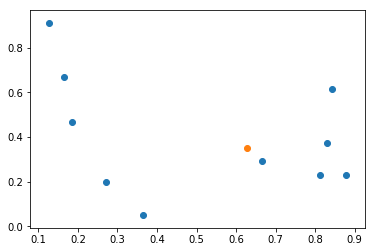

In [66]:
X = np.random.random((10, 2))
y = np.random.random((1, 2))

dist = (X - y).dot((X - y).transpose())
dist = dist[np.identity(10) > 0]
plt.scatter(X[:,0], X[:,1])
plt.scatter(y[:,0], y[:,1])
X[np.argmin(dist)]

**7.** Дана функция:

$$
 \begin{cases}
    x^2 + 2x + 6, & x < 0  \\
    x + 6, & 0 \le x \le 2 \\
    x^2 + 4x - 4, & x \ge 2
 \end{cases}
$$

Постройте массив из её значений на  $-3 \le x \le 3$.

In [75]:
m = 6 # кол-во точек

np.concatenate((((np.linspace(-3,0,int(m/2 + 1))[:-1]) ** 2 + 2 * (np.linspace(-3,0,int(m/2 + 1))[:-1]) + 6), 
 ((np.linspace(0,2,int(m/3 + 1))[:-1]) + 6),((np.linspace(0,2,int(m/6))) ** 2 + 4 * (np.linspace(0,2,int(m/6))) - 4)))

array([ 9.,  6.,  5.,  6.,  7., -4.])

**8.** Из каждого элемента матрицы вычесть среднее арифметическое от всех элементов в соответствующей строке (после чего среднее значение каждой строки должно равняться нулю).

Cм. [np.mean()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

In [10]:
X = np.random.random((10, 10))

result = X - (np.ones((10,10)) * np.mean(X, axis = 1)).transpose()
np.mean(result, axis = 1)

array([-6.66133815e-17, -8.88178420e-17, -1.11022302e-17,  6.66133815e-17,
        0.00000000e+00, -3.33066907e-17,  4.44089210e-17, -1.33226763e-16,
       -3.33066907e-17,  0.00000000e+00])

**9.** Есть массив из 1000 чисел, полученных из генератора случайных чисел, имеющий нормальное распределение. Посчитайте выборочное среднее и выборочную дисперсию. 

In [63]:
X = np.random.normal(loc=5, scale=2., size=1000)

print('выборочное среднее')
print(sum(X)/1000)
print('выборочная дисперсия')
print((sum(X**2)/1000) - (sum(X)/1000)**2)


выборочное среднее
5.014001359158205
выборочная дисперсия
4.249424684780383


**10.** Создать матрицу:

$$
\begin{pmatrix}
0 & 1 & 2 & 3 & 4 \\
1 & 2 & 3 & 4 & 0 \\
2 & 3 & 4 & 0 & 1 \\
3 & 4 & 0 & 1 & 2 \\
4 & 0 & 1 & 2 & 3
\end{pmatrix}
$$

In [21]:
np.ones((5,5)) * np.arange(0, 5)

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])